# hagar ahmed ali  1807055
# mai abozaid abdelaziz  1804475

### importing libraries to be used

In [642]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import random
from sklearn import datasets, linear_model, preprocessing

### loading the data

In [643]:
df = pd.read_csv("data.csv", header=0, index_col=0)
file = pd.read_csv ('data.csv',index_col=0)   
df.head(6)

location  country  gender   age  vis_wuhan  from_wuhan  symptom1  symptom2  \
0       104        8       1  66.0          1           0        14        31   
1       101        8       0  56.0          0           1        14        31   
2       137        8       1  46.0          0           1        14        31   
3       116        8       0  60.0          1           0        14        31   
4       116        8       1  58.0          0           0        14        31   
5        23        8       0  44.0          0           1        14        31   

   symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
0        19        12         3         1             8       1  
1        19        12         3         1             0       0  
2        19        12         3         1            13       0  
3        19        12         3         1             0       0  
4        19        12         3         1             0       0  
5        19        12         3         1             0       0

In [644]:
features_num = len(df.columns)
names = df.columns
names

Index(['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos', 'result'],
      dtype='object')

In [645]:
x = df.iloc[:, 0:13].values
x

array([[104.,   8.,   1., ...,   3.,   1.,   8.],
       [101.,   8.,   0., ...,   3.,   1.,   0.],
       [137.,   8.,   1., ...,   3.,   1.,  13.],
       ...,
       [  3.,   1.,   1., ...,   3.,   1.,   0.],
       [ 24.,   9.,   1., ...,   3.,   1.,   0.],
       [ 15.,  27.,   1., ...,   3.,   1.,   0.]])

In [646]:
y = df.iloc[:, 13].values
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

### knn

In [647]:
#splitting data into train & test

In [648]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.2, random_state=42)
test_data_size = len(xTest)
train_data_size = len(xTrain)
print(test_data_size)
print(train_data_size)

173
690


In [649]:
X_train_data_sets = [[]]
Y_train_data_sets = []
x_tmp = list()
y_tmp = list()

In [650]:
# hyperparameter tunning

In [651]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [652]:
from sklearn.model_selection import StratifiedKFold
k_range = range(1, 31)
k_scores = []
prec_scores = []

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xTrain, yTrain, cv=cv, scoring='recall')
    k_scores.append(scores.mean())

print(k_scores)

[0.6694444444444445, 0.5527777777777778, 0.7416666666666667, 0.55, 0.6708333333333334, 0.5152777777777777, 0.5736111111111111, 0.4416666666666667, 0.6097222222222222, 0.42777777777777776, 0.5263888888888889, 0.4527777777777778, 0.48888888888888893, 0.4541666666666667, 0.5027777777777777, 0.4541666666666666, 0.5041666666666667, 0.45555555555555555, 0.46805555555555556, 0.43194444444444446, 0.45555555555555555, 0.39722222222222225, 0.45555555555555555, 0.4222222222222222, 0.4222222222222222, 0.3736111111111111, 0.38472222222222224, 0.3486111111111111, 0.3736111111111111, 0.3486111111111111]


In [653]:
print('Length of list = ', len(k_scores))
print('Max of list = ', max(k_scores))

Length of list =  30
Max of list =  0.7416666666666667


In [654]:
best_k = k_scores.index(max(k_scores))+1
best_k

3

In [655]:
# cross validation

In [656]:
knn = KNeighborsClassifier(n_neighbors=best_k)

recall_scores = cross_val_score(knn, xTrain, yTrain, cv=cv, scoring='recall')
print(recall_scores)

[0.875      0.375      0.75       0.625      0.625      1.
 0.5        0.88888889 0.77777778 1.        ]


In [657]:
recall_scores.mean()

0.7416666666666667

In [658]:
# testing the model

In [659]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(knn, xTest, yTest)
len(y_predict)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [660]:
# performance measure

In [661]:
from sklearn import metrics

In [662]:
# Recall 
print(metrics.recall_score(yTest, y_predict))

0.56


In [663]:
# Precision 
print(metrics.precision_score(yTest, y_predict))

0.6363636363636364


In [664]:
# f1_score
print(metrics.f1_score(yTest, y_predict))

0.5957446808510639


In [665]:
# roc_auc_curve

In [666]:
y_predict_prob = cross_val_predict(knn, xTest, yTest, method='predict_proba')
y_predict_prob[:, 0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.33333333, 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 0.66666667, 1.        , 1.        , 1.     

In [667]:
y_predict_prob[:, 1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.66666667,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.33333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.33333333,
       0.        , 0.33333333, 0.        , 0.        , 0.     

In [668]:
print(metrics.roc_auc_score(yTest, y_predict_prob[:, 1]))

0.9089189189189189


In [669]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr , tpr , thresholds = roc_curve(yTest,y_predict_prob[:, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

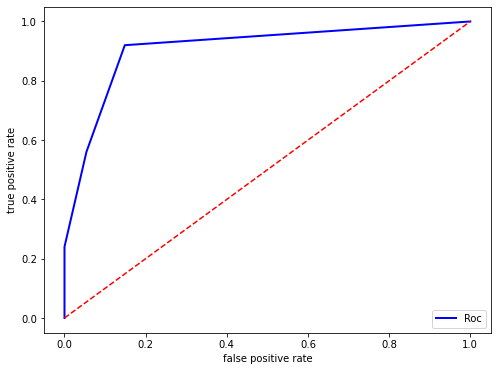

In [670]:
plt.figure(figsize = (8,6) )
plt.plot(fpr , tpr , "b" , linewidth = 2 , label = 'Roc'  )
plt.legend (loc = 'lower right')
plt.ylabel ('true positive rate')
plt.xlabel ('false positive rate')
plt.plot ([0,1] ,[0,1] , 'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.show

### logistic regression

In [671]:
#splitting data into train & test

In [672]:
from sklearn.preprocessing import StandardScaler
Xtr, Xts, ytr, yts = train_test_split(x,y, test_size=0.20, random_state=42)
scal = StandardScaler()
Xtr1 = scal.fit_transform(Xtr)
Xts1 = scal.transform(Xts) 
test_data_size = len(Xts1)
train_data_size = len(Xtr1)

print(test_data_size)
print(train_data_size)

173
690


In [673]:
#cross validation for training data

In [674]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [675]:
reg = linear_model.LogisticRegression(C=1e5)
scores = cross_val_score(reg, Xtr1, ytr, cv = cv, scoring='recall')
print(scores)

[0.75       0.5        0.75       0.75       0.75       0.625
 0.5        0.66666667 0.55555556 1.        ]


In [676]:
#hyperparameter tunning

In [677]:
# from sklearn.model_selection import StratifiedKFold
C_range = [1e5,100, 10, 1.0, 0.1, 0.01]
C_scores = []
# cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for c in C_range:
    reg = linear_model.LogisticRegression(C = c )
    scores = cross_val_score(reg, Xtr1, ytr, cv=cv, scoring='recall')
    C_scores.append(scores.mean())

print(C_scores)

[0.6847222222222221, 0.6847222222222221, 0.6847222222222221, 0.648611111111111, 0.5402777777777777, 0.0375]


In [678]:
C_scores.index(max(C_scores))

0

In [679]:
print('Length of list = ', len(C_scores))
print('Max of list = ', max(C_scores))

Length of list =  6
Max of list =  0.6847222222222221


In [680]:
best_C = 1e5

In [681]:
reg = linear_model.LogisticRegression(C = best_C)

recall_scores = cross_val_score(reg, Xtr1, ytr, cv=cv, scoring='recall')
print(recall_scores)

[0.75       0.5        0.75       0.75       0.75       0.625
 0.5        0.66666667 0.55555556 1.        ]


In [682]:
recall_scores.mean()

0.6847222222222221

In [683]:
# testing the model

In [684]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(reg, Xts1, yts)
len(y_predict)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [685]:
# measuring performance

In [686]:
from sklearn import metrics

In [687]:
# Recall 
print(metrics.recall_score(yts, y_predict))

0.6


In [688]:
# Precision 
print(metrics.precision_score(yts, y_predict))

0.7894736842105263


In [689]:
# f1_score
print(metrics.f1_score(yts, y_predict))

0.6818181818181819


In [690]:
# roc_auc curve

In [691]:
y_predict_prob = cross_val_predict(reg, Xts1, yts, method='predict_proba')
y_predict_prob[:, 0]

array([5.57131312e-01, 9.98864169e-01, 3.05999189e-01, 9.73298469e-01,
       1.23959951e-02, 7.99615076e-01, 9.98203078e-01, 9.16428459e-01,
       1.00000000e+00, 7.54339377e-01, 9.68135356e-01, 8.18410491e-01,
       7.22437259e-01, 9.96548570e-01, 9.75300426e-01, 9.99999749e-01,
       8.62985629e-01, 9.35770671e-01, 9.99946055e-01, 1.46847083e-02,
       9.97350149e-01, 7.22437259e-01, 9.99993141e-01, 9.77314153e-01,
       9.19698364e-01, 9.99999995e-01, 9.88597229e-01, 9.99930188e-01,
       9.56811571e-01, 4.54121163e-01, 9.99099583e-01, 9.99975269e-01,
       2.68670847e-01, 9.99855793e-01, 8.57882844e-01, 9.99999958e-01,
       9.99004473e-01, 9.99999991e-01, 9.99857228e-01, 1.40802715e-01,
       9.99999999e-01, 9.99999998e-01, 9.78095706e-01, 9.99094871e-01,
       9.99906288e-01, 1.00000000e+00, 9.31857657e-01, 9.94888466e-01,
       9.89967861e-01, 1.00000000e+00, 9.98999412e-01, 9.93010017e-01,
       9.99155175e-01, 9.99990204e-01, 9.72099682e-01, 9.95945764e-01,
      

In [692]:
y_predict_prob[:, 1]

array([4.42868688e-01, 1.13583089e-03, 6.94000811e-01, 2.67015315e-02,
       9.87604005e-01, 2.00384924e-01, 1.79692151e-03, 8.35715413e-02,
       2.67405709e-11, 2.45660623e-01, 3.18646444e-02, 1.81589509e-01,
       2.77562741e-01, 3.45143049e-03, 2.46995740e-02, 2.51055021e-07,
       1.37014371e-01, 6.42293290e-02, 5.39448430e-05, 9.85315292e-01,
       2.64985111e-03, 2.77562741e-01, 6.85914708e-06, 2.26858468e-02,
       8.03016356e-02, 4.81175821e-09, 1.14027711e-02, 6.98123145e-05,
       4.31884286e-02, 5.45878837e-01, 9.00416576e-04, 2.47306172e-05,
       7.31329153e-01, 1.44206512e-04, 1.42117156e-01, 4.23918704e-08,
       9.95527335e-04, 8.85243578e-09, 1.42772075e-04, 8.59197285e-01,
       1.48774426e-09, 1.81456527e-09, 2.19042943e-02, 9.05129033e-04,
       9.37119785e-05, 1.57712212e-10, 6.81423427e-02, 5.11153377e-03,
       1.00321388e-02, 4.20766005e-10, 1.00058758e-03, 6.98998257e-03,
       8.44824875e-04, 9.79575503e-06, 2.79003182e-02, 4.05423567e-03,
      

In [693]:
yts

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [694]:
print(metrics.roc_auc_score(yts, y_predict_prob[:, 1]))

0.8818918918918919


In [695]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr , tpr , thresholds = roc_curve(yts,y_predict_prob[:, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

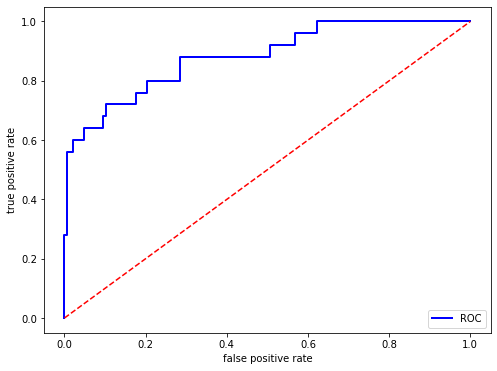

In [696]:
plt.figure(figsize = (8,6) )
plt.plot(fpr , tpr , "b" , linewidth = 2 , label = 'ROC'  )
plt.legend (loc = 'lower right')
plt.ylabel ('true positive rate')
plt.xlabel ('false positive rate')
plt.plot ([0,1] ,[0,1] , 'r--')
plt.show

### Naive Bayes 

In [697]:
#splitting data into train & test

In [698]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state = 42 ) 

In [699]:
# testing the model

In [700]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)
ypred  =  classifier.predict(xtest)
ypred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [701]:
# measuring performance

In [702]:
ypred_prob = classifier.predict_proba(xtest)

In [703]:
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score ,roc_curve , roc_auc_score
c_mtx = confusion_matrix(ytest, ypred)
acc = accuracy_score(ytest,ypred)
psc = precision_score(ytest,ypred)
rcl = recall_score(ytest,ypred)
f1 = f1_score(ytest,ypred)
# fpr , tpr , thresholds = roc_curve(ytest,ypred)
# roc_auc_score = roc_auc_score(ytest,ypred)
fpr , tpr , thresholds = roc_curve(ytest,ypred_prob[:, 1])
roc_auc_score = roc_auc_score(ytest,ypred_prob[:, 1])

In [704]:
# accuracy

In [705]:
acc

0.6184971098265896

In [706]:
#precision

In [707]:
psc

0.26436781609195403

In [708]:
# recall

In [709]:
rcl

0.92

In [710]:
# f1_ score

In [711]:
f1

0.41071428571428575

In [712]:
#roc_auc_score

In [713]:
roc_auc_score

0.8672972972972973

In [714]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr , tpr , thresholds = roc_curve(ytest,ypred_prob[:, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

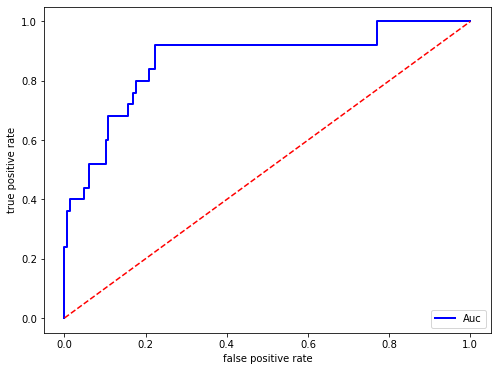

In [715]:
plt.figure(figsize = (8,6) )
plt.plot(fpr , tpr , "b" , linewidth = 2 , label = 'Auc'  )
plt.legend (loc = 'lower right')
plt.ylabel ('true positive rate')
plt.xlabel ('false positive rate')
plt.plot ([0,1] ,[0,1] , 'r--')
plt.show

### Decision tree

In [716]:
# Data Analysis

In [717]:
len(df)

863

In [718]:
df.shape

(863, 14)

In [719]:
df.head()

location  country  gender   age  vis_wuhan  from_wuhan  symptom1  symptom2  \
0       104        8       1  66.0          1           0        14        31   
1       101        8       0  56.0          0           1        14        31   
2       137        8       1  46.0          0           1        14        31   
3       116        8       0  60.0          1           0        14        31   
4       116        8       1  58.0          0           0        14        31   

   symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
0        19        12         3         1             8       1  
1        19        12         3         1             0       0  
2        19        12         3         1            13       0  
3        19        12         3         1             0       0  
4        19        12         3         1             0       0

In [720]:
df.tail()

location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
858        48        3       2  24.0          0           0        14   
859         0        0       2  35.0          0           0        14   
860         3        1       1  49.4          0           0        14   
861        24        9       1  49.4          0           0        14   
862        15       27       1  70.0          0           0        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
858        31        19        12         3         1             0       1  
859        31        19        12         3         1             0       0  
860        31        19        12         3         1             0       0  
861        31        19        12         3         1             0       0  
862        31        19        12         3         1             0       0

In [721]:
df.describe()

location     country      gender         age   vis_wuhan  from_wuhan  \
count  863.000000  863.000000  863.000000  863.000000  863.000000  863.000000   
mean    76.645423   16.995365    0.849363   49.400000    0.181924    0.107764   
std     39.200264    7.809951    0.726062   15.079203    0.386005    0.310261   
min      0.000000    0.000000    0.000000    2.000000    0.000000    0.000000   
25%     45.000000   11.000000    0.000000   40.000000    0.000000    0.000000   
50%     87.000000   18.000000    1.000000   49.400000    0.000000    0.000000   
75%    110.000000   24.000000    1.000000   57.000000    0.000000    0.000000   
max    138.000000   33.000000    2.000000   96.000000    1.000000    1.000000   

        symptom1    symptom2    symptom3    symptom4    symptom5    symptom6  \
count  863.00000  863.000000  863.000000  863.000000  863.000000  863.000000   
mean    12.13905   28.002317   18.298957   11.840093    2.993048    0.998841   
std      3.99787    7.473231    2.864064    1.183771    0.127251    0.034040   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     14.00000   31.000000   19.000000   12.000000    3.000000    1.000000   
50%     14.00000   31.000000   19.000000   12.000000    3.000000    1.000000   
75%     14.00000   31.000000   19.000000   12.000000    3.000000    1.000000   
max     24.00000   31.000000   19.000000   12.000000    3.000000    1.000000   

       diff_sym_hos      result  
count    863.000000  863.000000  
mean       0.995365    0.125145  
std        2.358767    0.331075  
min       -5.000000    0.000000  
25%        0.000000    0.000000  
50%        0.000000    0.000000  
75%        1.000000    0.000000  
max       15.000000    1.000000

In [722]:
feature_cols = ["location", "country", "gender", "age", "vis_wuhan", "from_wuhan",
       "symptom1", "symptom2", "symptom3", "symptom4", "symptom5", "symptom6",
       "diff_sym_hos"]


In [723]:
#cross validation

In [724]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [725]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 42) #no hyperparam
scores = cross_val_score(classifier, xtrain, ytrain, cv = cv, scoring='recall')
print(scores)

[1.         0.75       0.875      0.875      0.875      0.75
 0.75       0.44444444 0.66666667 1.        ]


In [726]:
#hyperparameters tunnig

In [727]:
# from sklearn.model_selection import StratifiedKFold
max_depth_range = [2, 3, 5, 10, 20] #10
min_samples_leaf_range = [5, 10, 20, 50, 100] #5
tree_scores = []
# cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for t1 in max_depth_range :
    for t2 in min_samples_leaf_range :
      classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = t1, min_samples_leaf = t2, random_state = 42)
      scores = cross_val_score(classifier, xtrain, ytrain, cv=cv, scoring='recall')
      tree_scores.append(scores.mean())

print(tree_scores)

[0.575, 0.5027777777777778, 0.5027777777777778, 0.6125, 0.25, 0.5999999999999999, 0.5388888888888889, 0.6277777777777778, 0.6125, 0.25, 0.7152777777777779, 0.6611111111111111, 0.6152777777777778, 0.6125, 0.25, 0.7388888888888889, 0.648611111111111, 0.6152777777777778, 0.6125, 0.25, 0.7388888888888889, 0.648611111111111, 0.6152777777777778, 0.6125, 0.25]


In [728]:
tree_scores.index(max(tree_scores)) # at depth = 10 & sample_leaf = 5

15

In [729]:
best_depth = 10

In [730]:
best_samples_leaf = 5

In [731]:
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = best_depth, min_samples_leaf = best_samples_leaf, random_state = 42)
recall_scores = cross_val_score(classifier, xtrain, ytrain, cv=cv, scoring='recall')
print(recall_scores) #scores is much better than scores without hyperparameters

[0.75       0.75       0.875      0.75       0.875      0.75
 0.75       0.55555556 0.44444444 0.88888889]


In [732]:
recall_scores.mean()

0.7388888888888889

In [733]:
#testing the model

In [734]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(classifier, xtest, ytest)
len(y_predict)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [735]:
data_p = pd.DataFrame({"actual": ytest, "predicted": y_predict})
data_p

actual  predicted
0         0          0
1         0          0
2         1          1
3         0          0
4         1          1
..      ...        ...
168       1          1
169       1          1
170       1          1
171       0          0
172       0          0

[173 rows x 2 columns]

In [736]:
#measuring performance
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [737]:
print(classification_report(ytest, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       148
           1       0.74      0.56      0.64        25

    accuracy                           0.91       173
   macro avg       0.83      0.76      0.79       173
weighted avg       0.90      0.91      0.90       173



In [738]:
# roc_auc curve

In [739]:
y_predict_prob = cross_val_predict(classifier, xtest, ytest, method='predict_proba')
y_predict_prob[:, 0]

array([1.        , 1.        , 0.4       , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.4       , 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 0.16666667,
       1.        , 1.        , 0.71428571, 1.        , 1.        ,
       1.        , 1.        , 0.71428571, 1.        , 0.16666667,
       1.        , 0.71428571, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.6       , 1.        , 0.5       ,
       0.6       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.6       ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.6       ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [740]:
y_predict_prob[:, 1]

array([0.        , 0.        , 0.6       , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.6       , 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.83333333,
       0.        , 0.        , 0.28571429, 0.        , 0.        ,
       0.        , 0.        , 0.28571429, 0.        , 0.83333333,
       0.        , 0.28571429, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.4       , 0.        , 0.5       ,
       0.4       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.4       ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.4       ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [741]:
print(metrics.roc_auc_score(ytest, y_predict_prob[:, 1]))

0.8479729729729729


In [742]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr , tpr , thresholds = roc_curve(ytest,y_predict_prob[:, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

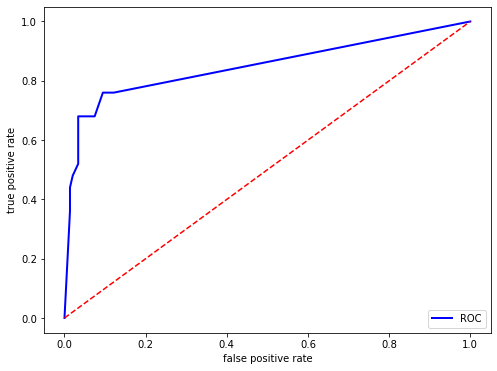

In [743]:
plt.figure(figsize = (8,6) )
plt.plot(fpr , tpr , "b" , linewidth = 2 , label = 'ROC'  )
plt.legend (loc = 'lower right')
plt.ylabel ('true positive rate')
plt.xlabel ('false positive rate')
plt.plot ([0,1] ,[0,1] , 'r--')
plt.show

In [744]:
#visualizing decision trees

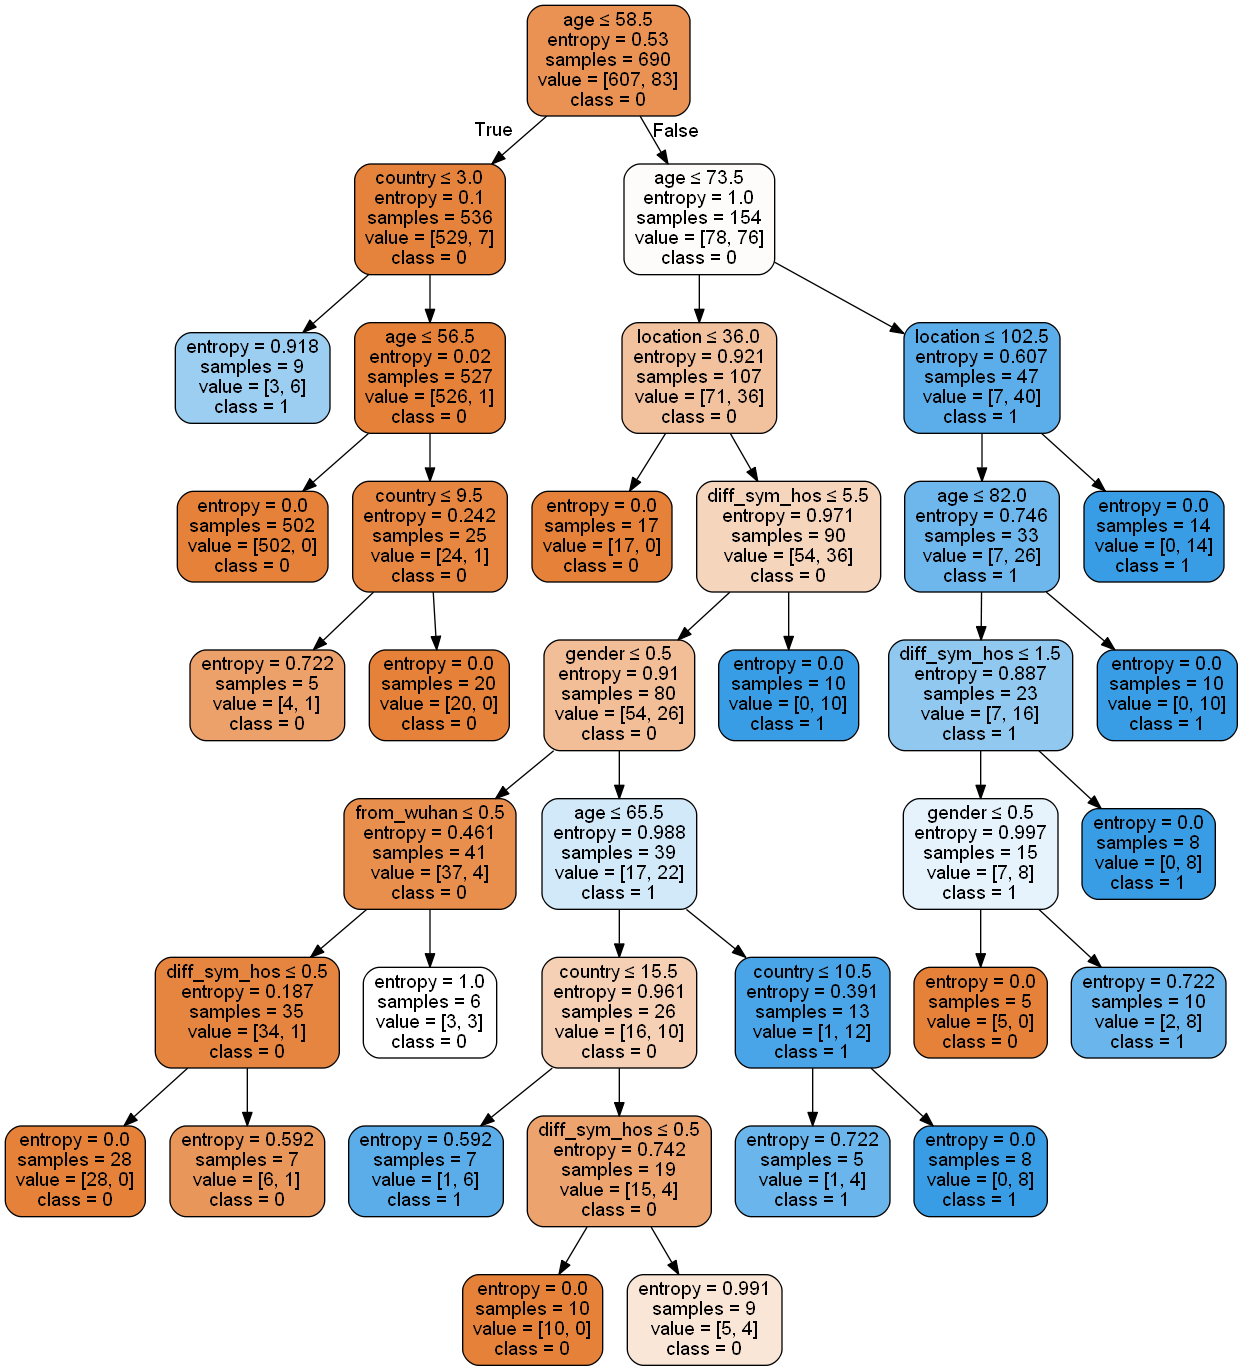

In [745]:

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
classifier.fit(xtrain, ytrain)
dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, rounded = True, filled = True, special_characters = True, \
               feature_names = feature_cols, class_names = ["0", "1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("data.csv")
Image(graph.create_png())

### SVM

In [746]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
import math
from sklearn.model_selection import KFold

In [747]:
#in case we remove the unknown genders
X = x[(file["gender"] !=2)]  
Y = y[(file["gender"] !=2)]
print("Considering the unknown gender rows",y.shape)
print("Removing the unknown gender rows",Y.shape)

Considering the unknown gender rows (863,)
Removing the unknown gender rows (691,)


In [748]:
#removing unknown genders
X = x[(file["gender"] !=2)]  
Y = y[(file["gender"] !=2)]
print("taking unknown gender into consideration -> rows",y.shape)
print("ignoring unknown gender -> rows",Y.shape)

taking unknown gender into consideration -> rows (863,)
ignoring unknown gender -> rows (691,)


In [749]:
stan_x    = StandardScaler()    
XTrain = stan_x.fit_transform(xTrain)    
XTest  = stan_x.transform(xTest)

In [750]:
gen_SVM= SVC(random_state=42)

In [751]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(gen_SVM, param_grid, refit = True)
grid.fit(XTrain,yTrain)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'linear']})

In [752]:
print ("best param: ",grid.best_params_)
print ("best score: ",grid.best_score_)

best param:  {'C': 10, 'kernel': 'rbf'}
best score:  0.9681159420289855


In [753]:
#building the mode
SVM_model = SVC(C=100,kernel='rbf', probability=True) #gamma=0.01,

In [754]:
#cross_validation
recall_=[]
F1=[]

for i in range(2,6): 
    kf= KFold(n_splits=i,random_state=42,shuffle=True)
    for train_index, val_index in kf.split(xTrain): 
        x_Train, x_val = xTrain[train_index], xTrain[val_index]
        y_Train, Y_val = yTrain[train_index], yTrain[val_index]
    SVM_model.fit (x_Train,y_Train)
    y_predict=SVM_model.predict(x_val)
    recall_.append(recall_score(Y_val,y_predict))
    print ("CV = ",i,classification_report(Y_val,y_predict))
print(recall_)

CV =  2               precision    recall  f1-score   support

           0       0.97      0.97      0.97       309
           1       0.76      0.72      0.74        36

    accuracy                           0.95       345
   macro avg       0.87      0.85      0.86       345
weighted avg       0.95      0.95      0.95       345

CV =  3               precision    recall  f1-score   support

           0       0.97      0.99      0.98       209
           1       0.83      0.71      0.77        21

    accuracy                           0.96       230
   macro avg       0.90      0.85      0.87       230
weighted avg       0.96      0.96      0.96       230

CV =  4               precision    recall  f1-score   support

           0       0.98      0.99      0.98       158
           1       0.85      0.79      0.81        14

    accuracy                           0.97       172
   macro avg       0.91      0.89      0.90       172
weighted avg       0.97      0.97      0.97       

In [755]:
kf= KFold(n_splits=4,random_state=42,shuffle=True) #n_splits=3
for train_index, val_index in kf.split(xTrain): 
    x_Train, x_val = xTrain[train_index], xTrain[val_index]
    y_Train, Y_val = yTrain[train_index], yTrain[val_index]

In [756]:
# testing the model

In [757]:
y_predict=SVM_model.predict(xTest)

In [758]:
# measuring performance

In [759]:
print("accuracy: ",accuracy_score(y_predict,yTest))
print("recall: ",recall_score(y_predict,yTest))
print("precision: ",precision_score(y_predict,yTest))
print("F1: ",f1_score(y_predict,yTest))
print("CM ",confusion_matrix(y_predict,yTest))

accuracy:  0.9364161849710982
recall:  0.8181818181818182
precision:  0.72
F1:  0.7659574468085107
CM  [[144   7]
 [  4  18]]


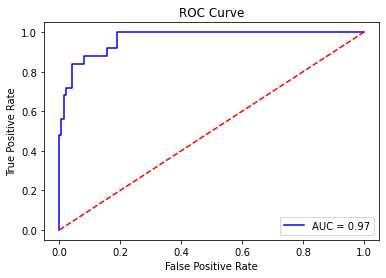

In [760]:
from sklearn.metrics import auc
y_prob=SVM_model.predict_proba(xTest)[:,1]
fpr, tpr, threshold = roc_curve(yTest,y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()
